# Spins and Leaps

## Analysis

Steve Taylor, Nov-2021

## Overview

This is a 2nd grader bit of homework, in which each player rolls dice, then spins a multiplier, to move their piece on a track, 100 squares long.

From the instructions, "... take turns rolling two dice to determine the number of small steps to take forward and spinning a spinner to leap forward by 10s."

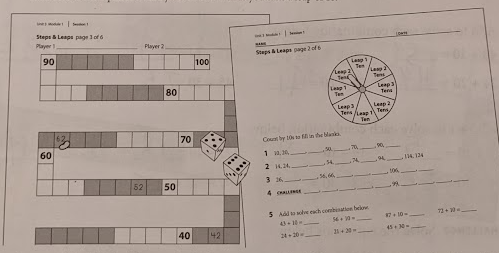

## Hypothesis

One doesn't have to play this many times with a seven year-old to realize that whoever starts first tends to win. But is that always true?

With nothing to back this "hunch", I propose that the player that starts first, wins.

A separate notebook runs the game with N number of players, M number of times against a board O spaces long, saving each set into a CSV file.

### Setup and imports

In [1]:
%load_ext nb_black

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [2]:
def read_game_file(user_count=4, game_plays=1, game_spaces=100):
    """
    Read a game file in given a fixed format in the filename variable.

    Returns a tuple with True and a dataframe if successfully read. Else False, None.
    """
    filename = f"game-{user_count}_players-{game_plays}_games-{game_spaces}_spaces.csv"
    print(f"Reading file {filename}")
    try:
        df = pd.read_csv(filename)
        return True, df
    except:
        return False, None

<IPython.core.display.Javascript object>

## A four player game

In [3]:
status, df = read_game_file(user_count=4, game_plays=1000, game_spaces=100)
df.head() if status else "Bad read."

Reading file game-4_players-1000_games-100_spaces.csv


,game_number,name,space,color,turns,winner,player_number
0,0,PLAYER 1,85,green,4,0,1
1,0,PLAYER 2,115,red,4,1,2
2,0,PLAYER 3,97,yellow,3,0,3
3,0,PLAYER 4,84,blue,3,0,4
4,1,PLAYER 1,101,green,4,1,1


<IPython.core.display.Javascript object>

In [4]:
df.dtypes

game_number       int64
name             object
space             int64
color            object
turns             int64
winner            int64
player_number     int64
dtype: object

<IPython.core.display.Javascript object>

It's always worth checking to see how columns are correlated.

What we can see is that the turns and winners are the strongest correlations. If it's true that whoever starts first wins, then we should see turns and the winner nearly even, so though these are correlated, there's likely not much more there. It does beg the question as to why those numbers aren't more _strongly_ correlatated than ~70%.

In [5]:
corr = round(df.corr(), 2)
corr

,game_number,space,turns,winner,player_number
game_number,1.00,-0.02,-0.01,0.00,-0.00
space,-0.02,1.00,0.70,0.72,-0.43
turns,-0.01,0.70,1.00,0.53,-0.55
winner,0.00,0.72,0.53,1.00,-0.39
player_number,-0.00,-0.43,-0.55,-0.39,1.00


<IPython.core.display.Javascript object>

Nice to see it in a heatmap. Here using Panda's built-in matplotlib.

In [6]:
corr.style.background_gradient(cmap="coolwarm").format(precision=2)

,game_number,space,turns,winner,player_number
game_number,1.00,-0.02,-0.01,0.00,-0.00
space,-0.02,1.00,0.70,0.72,-0.43
turns,-0.01,0.70,1.00,0.53,-0.55
winner,0.00,0.72,0.53,1.00,-0.39
player_number,-0.00,-0.43,-0.55,-0.39,1.00


<IPython.core.display.Javascript object>

And here using seaborn to see it a bit more clearly.

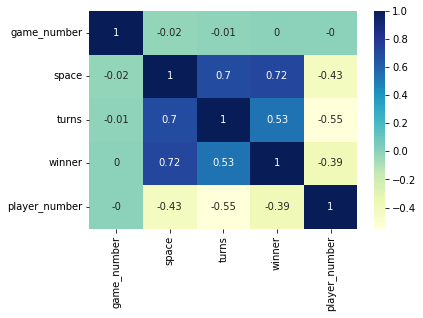

<IPython.core.display.Javascript object>

In [7]:
ax = sns.heatmap(
    corr,
    annot=True,
    cmap="YlGnBu",
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
)

Verify that there are two players, and note the distribution of wins.

In [8]:
df[["player_number"]].where(df.winner == 1).dropna().value_counts()

player_number
1.0              536
2.0              266
3.0              123
4.0               75
dtype: int64

<IPython.core.display.Javascript object>

Same information but plotted.

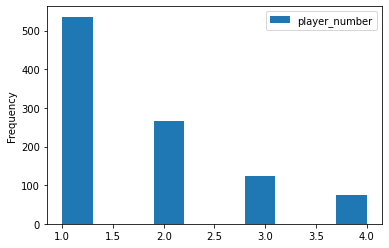

<IPython.core.display.Javascript object>

In [9]:
ax = df[["player_number"]].where(df.winner == 1).dropna().plot.hist()

## A two player game

Run a two player game many times and create a final dataframe.

In [10]:
status, df = read_game_file(user_count=2, game_plays=1000, game_spaces=100)
df.head() if status else "Bad read."

Reading file game-2_players-1000_games-100_spaces.csv


,game_number,name,space,color,turns,winner,player_number
0,0,PLAYER 1,100,green,4,1,1
1,0,PLAYER 2,59,red,3,0,2
2,1,PLAYER 1,109,green,6,1,1
3,1,PLAYER 2,87,red,5,0,2
4,2,PLAYER 1,103,green,3,1,1


<IPython.core.display.Javascript object>

Verify that there are two players, and note the distribution of wins.

In [11]:
df[["player_number"]].where(df.winner == 1).dropna().value_counts()

player_number
1.0              693
2.0              307
dtype: int64

<IPython.core.display.Javascript object>

Same information but plotted.

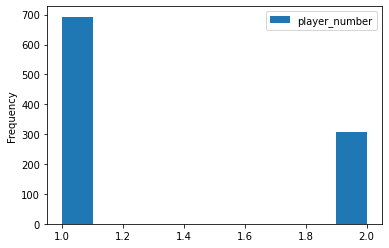

<IPython.core.display.Javascript object>

In [12]:
ax = df[["player_number"]].where(df.winner == 1).dropna().plot.hist()

## Conclusion

My assertion was that the player that starts first always wins. This isn't true. However, the first player _almost_ always wins, in most cases twice as likely as any other player. If I modify the hypothesis to assert that the first player has the best odds to win, then my hypothesis would hold.

One follow-on idea is to increase the board space count. The following shows that at some point where the game space are **greatly** increased, then all players start to have an even chance of winning.

In [13]:
status, df = read_game_file(user_count=4, game_plays=1000, game_spaces=10000)
df.shape if status else "Bad read."

Reading file game-4_players-1000_games-10000_spaces.csv


(4000, 7)

<IPython.core.display.Javascript object>

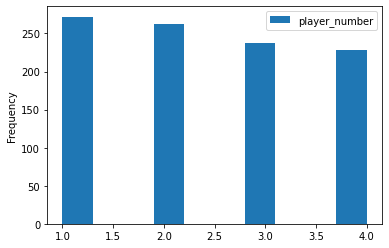

<IPython.core.display.Javascript object>

In [14]:
ax = df[["player_number"]].where(df.winner == 1).dropna().plot.hist()